In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Preparing data

## 1.1. Read CSV file

In [2]:
df = pd.read_csv(r"D:\Data Analysis\Anna. Project\Python\Heart disease\heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

## 1.2. Check data types and missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  num       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 1.3. Rename the columns

In [5]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

## 1.4. Data Imbalance Check

In [6]:
target=df.groupby('target').size()
target

target
0    499
1    526
dtype: int64

## 1.5. Convert numerical chest pain codes in the dataset into descriptive text labels

In [7]:
def chest_pain(row):
    if row==1:
        return 'Typical Angina'
    elif row==2:
        return 'Atypical Angina'
    elif row==3:
        return 'Non-Anginal pain'
    elif row==4:
        return 'Asymptomatic'

In [8]:
df['Chest_Pain']=df['chest_pain_type'].apply(chest_pain)

## 1.6. Map values in the heart disease column

In [9]:
def heart_disease(series):
    if series==0:
        return 'Absent'
    elif series==1:
        return 'Present'

In [10]:
df['heart_disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent


## 1.7. Map values in the sex column

In [11]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [12]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'


In [13]:
df['sex1']=df['sex'].apply(gender)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,heart_disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent,Female


## 1.8. Create age group

In [14]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [15]:
def age_range(age):
    if 29 <= age <= 40:
        return 'Young'
    elif 40 < age <= 55:
        return 'Middle Aged'
    else:
        return 'Elderly'


In [16]:
df['Age_Range'] = df['age'].apply(age_range)


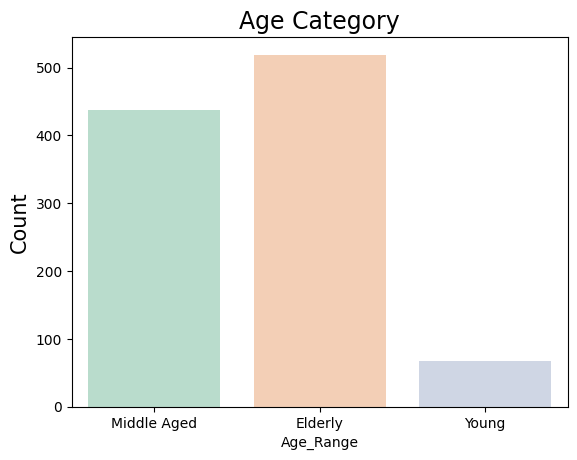

In [18]:
sns.countplot(data=df, x='Age_Range', hue='Age_Range', palette='Pastel2', legend=False)
plt.title('Age Category', fontsize=17)
plt.ylabel('Count', fontsize=15)
plt.show()


## 1.9. To check and remove outliers in *Numerical* Variables

In [19]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'Chest_Pain',
       'heart_disease', 'sex1', 'Age_Range'],
      dtype='object')

### Check outliers of blood sugar

<Axes: ylabel='resting_blood_sugar'>

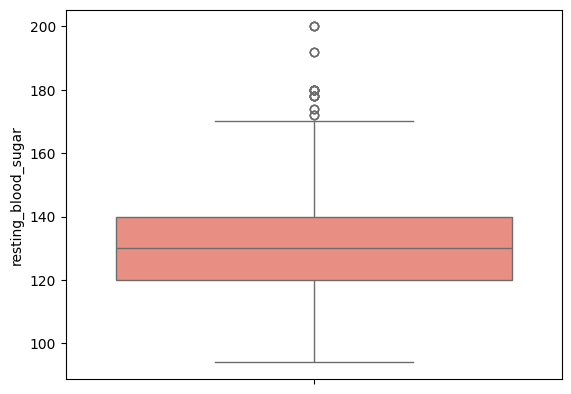

In [20]:
sns.boxplot(data=df['resting_blood_sugar'],color='salmon')

### Checking outliers of cholesterol

<Axes: ylabel='cholesterol'>

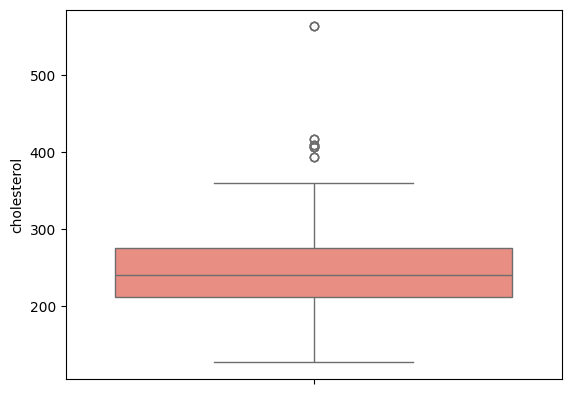

In [21]:
sns.boxplot(data=df['cholesterol'],color='salmon')

### Checking outliers of max heart rate achieved

<Axes: ylabel='max_heart_rate_achieved'>

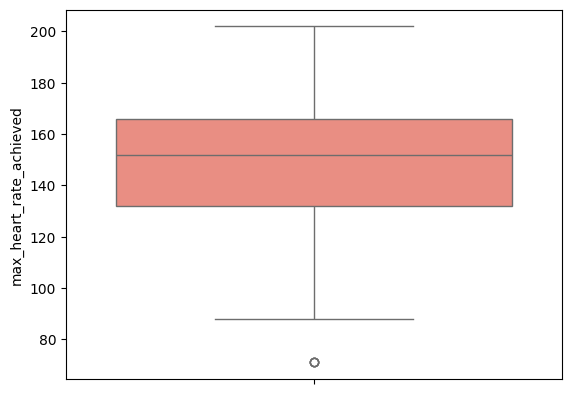

In [22]:
sns.boxplot(data=df['max_heart_rate_achieved'],color='salmon')

### Checking outliers of depression

<Axes: ylabel='st_depression'>

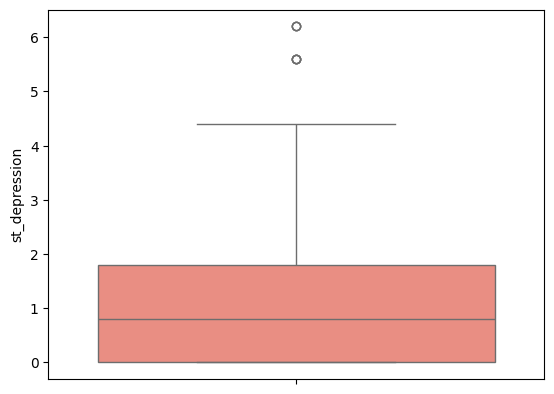

In [23]:
sns.boxplot(data=df['st_depression'],color='salmon')

### From the box plots we can see there are Outliers in st_depression, max_heart_rate_achieved, resting_blood_sugar and cholesterol in these variables. So lets drop the outlier value and replace the outlier using IQR.

In [24]:
df1=df.copy()

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

### Remove outliers in cholesterol

In [26]:
low_chol, upp_chol = remove_outlier(df1['cholesterol'])
low_chol
df1['cholesterol'] = np.where(df1['cholesterol']>upp_chol, upp_chol, df1['cholesterol'])
df1['cholesterol'] = np.where(df1['cholesterol']<low_chol, low_chol, df1['cholesterol'])

<Axes: xlabel='cholesterol'>

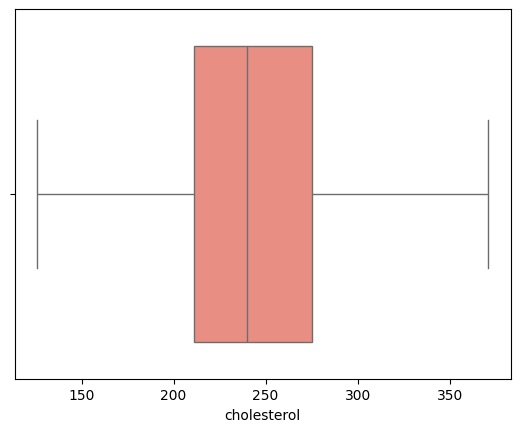

In [27]:
sns.boxplot(x = 'cholesterol', data = df1,color='salmon')

### Remove outliers in st_depression

In [28]:
low_depr, upp_depr = remove_outlier(df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']>upp_depr, upp_depr, df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']<low_depr, low_depr, df1['st_depression'])

<Axes: xlabel='st_depression'>

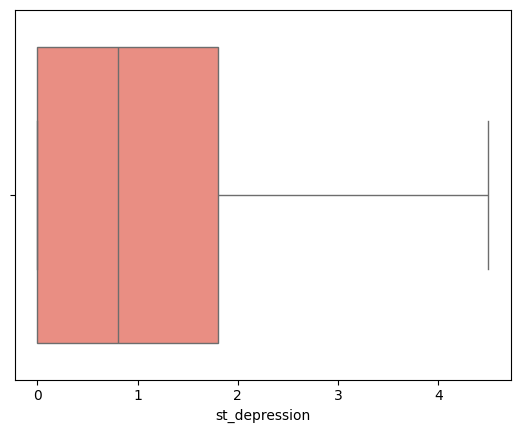

In [29]:
sns.boxplot(x = 'st_depression', data = df1,color='salmon')

### Remove outliers in max_heart_rate_achieved

In [30]:
low_hrate, upp_hrate = remove_outlier(df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']>upp_hrate, upp_hrate, df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']<low_hrate, low_hrate, df1['max_heart_rate_achieved'])

<Axes: xlabel='max_heart_rate_achieved'>

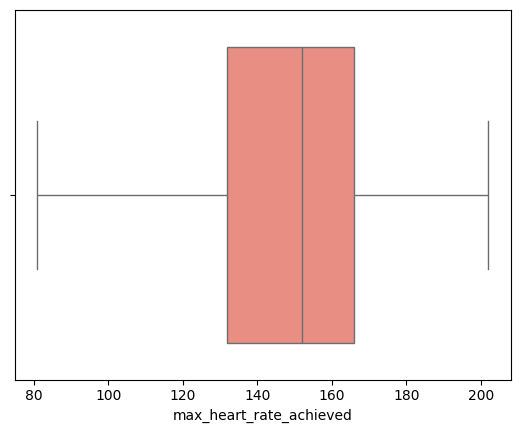

In [31]:
sns.boxplot(x = 'max_heart_rate_achieved', data = df1,color='salmon')

### Remove outliers in resting_blood_sugar

In [32]:
low_rbs, upp_rbs = remove_outlier(df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']>upp_rbs, upp_rbs, df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']<low_rbs, low_rbs, df1['resting_blood_sugar'])

<Axes: xlabel='resting_blood_sugar'>

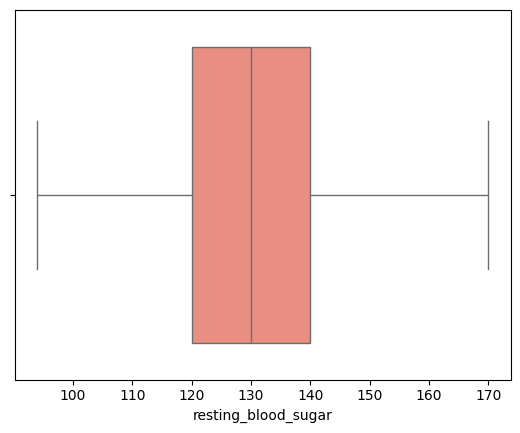

In [33]:
sns.boxplot(x = 'resting_blood_sugar', data = df1,color='salmon')

In [34]:
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,heart_disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent,Male,Middle Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent,Male,Middle Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent,Male,Elderly
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent,Male,Elderly
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent,Female,Elderly


# 2. Analysing data

## 2.1. Count number of heart disease

In [35]:
hd=df.groupby('heart_disease')['target'].count()
hd

heart_disease
Absent     499
Present    526
Name: target, dtype: int64

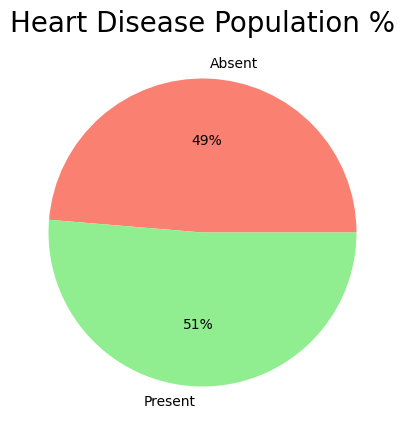

In [36]:
plt.figure(figsize=(10,5))
plt.pie(hd, labels=['Absent','Present'],colors=['salmon','lightgreen'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

## 2.2. Heart Disease by Sex

In [37]:
# Compare target column with sex column
pd.crosstab(df.heart_disease,df.sex1)

sex1,Female,Male
heart_disease,,
Absent,86,413
Present,226,300


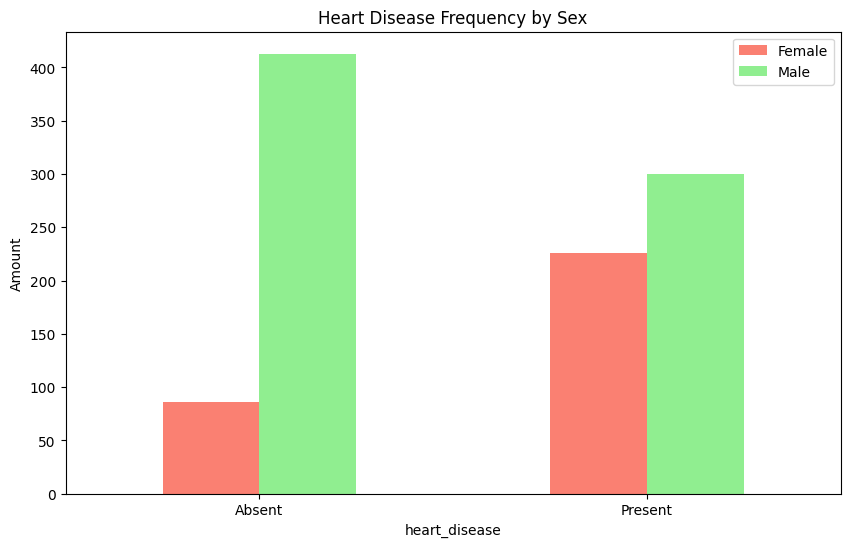

In [38]:
pd.crosstab(df.heart_disease,df.sex1).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightgreen"])
plt.title("Heart Disease Frequency by Sex")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Males still dominate, but the gap between males and females narrows. There are more females with heart disease than without.

## 2.3. Age Distribution by Gender

C:\Users\annaq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\annaq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\annaq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


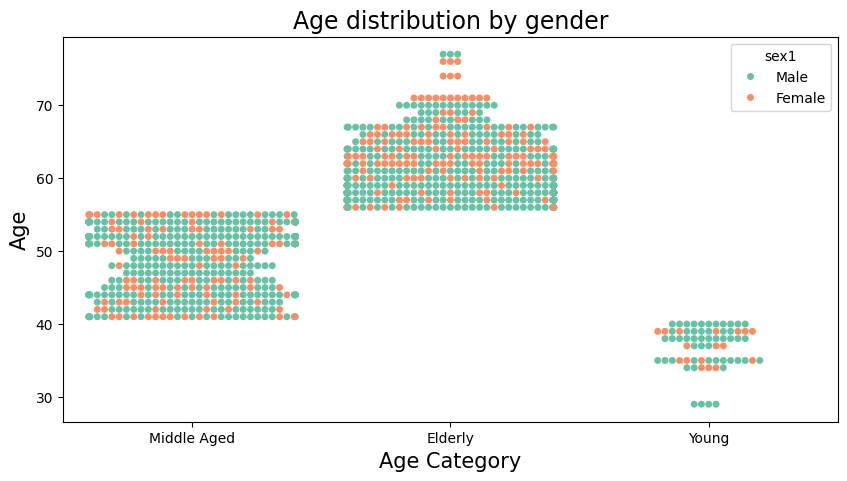

In [43]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=df, palette='Set2')
plt.title('Age distribution by gender', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

## 2.4. Heart disease by age group

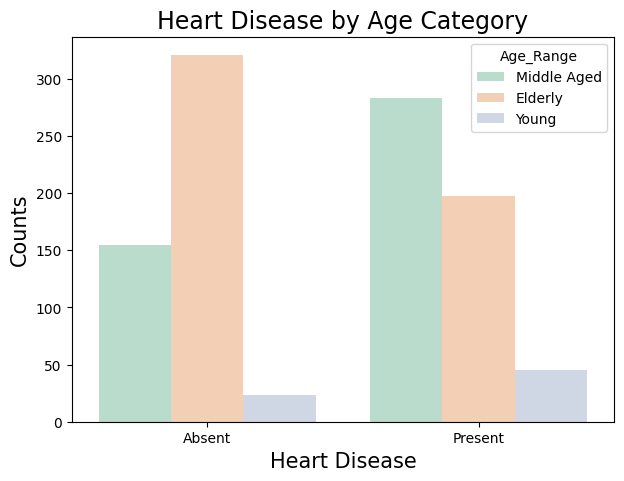

In [45]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='heart_disease', hue='Age_Range', data=df,  palette='Pastel2')
plt.title('Heart Disease by Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### Middle-aged individuals are at the highest risk, based on raw count. Elderly people are more numerous overall but proportionally less represented among heart disease cases than middle-aged. Young individuals have low total counts, but those present are more skewed toward disease than healthy.

## 2.5. Heart disease by chest pain experienced

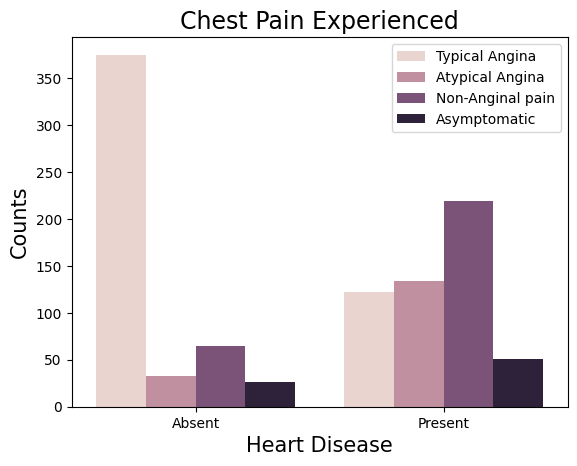

In [46]:
##Count Plot Creation of Chest Pain Experienced
%matplotlib inline
sns.countplot(x=df['heart_disease'], hue='chest_pain_type', data=df1)
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

### Typical angina is most common among individuals without heart disease, indicating a lower diagnostic value. Non-anginal pain and atypical angina are more frequent in those with heart disease, suggesting stronger predictive relevance. Asymptomatic cases, though fewer, are mostly associated with heart disease, highlighting the risk of silent conditions.

## 2.6. Heart disease by resting blood sugar

<Axes: ylabel='count'>

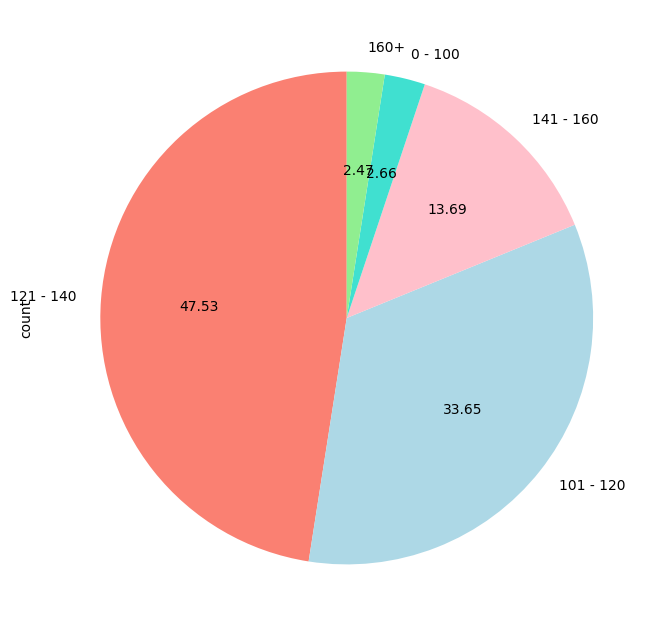

In [49]:
df1['bins'] = pd.cut(df1['resting_blood_sugar'],bins=[0,100,120,140,160,180], labels=["0 - 100","101 - 120","121 - 140","141 - 160","160+"])
plt.figure(figsize=(8,8))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["salmon","lightblue","pink","turquoise","lightgreen"],startangle=90,fontsize=10)

### 47.53% of heart disease cases have resting blood sugar in the 121–140 range, making it the most common group among heart disease patients. Patients having resting blood sugar(diastolic state) <90mm Hg in diastolic state have less chances of heart disease.

## 2.7. Heart Disease by Cholestrol Level

C:\Users\annaq\AppData\Local\Temp\ipykernel_15036\1963944496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='cholesterol', data=df1, palette='Set2')


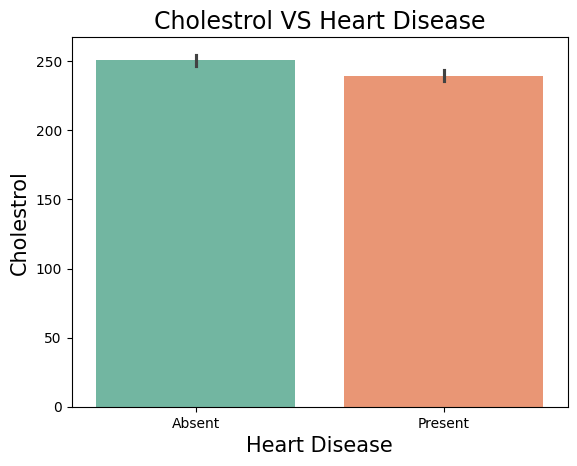

In [53]:
#Bar Plot Creation of Cholestrol VS Heart Disease

sns.barplot(x='heart_disease', y='cholesterol', data=df1, palette='Set2')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Higher Cholestrol Level results Chances Of Heart Disease

Text(0.0, 1.0, 'Heart Disease by Cholestrol Level\n')

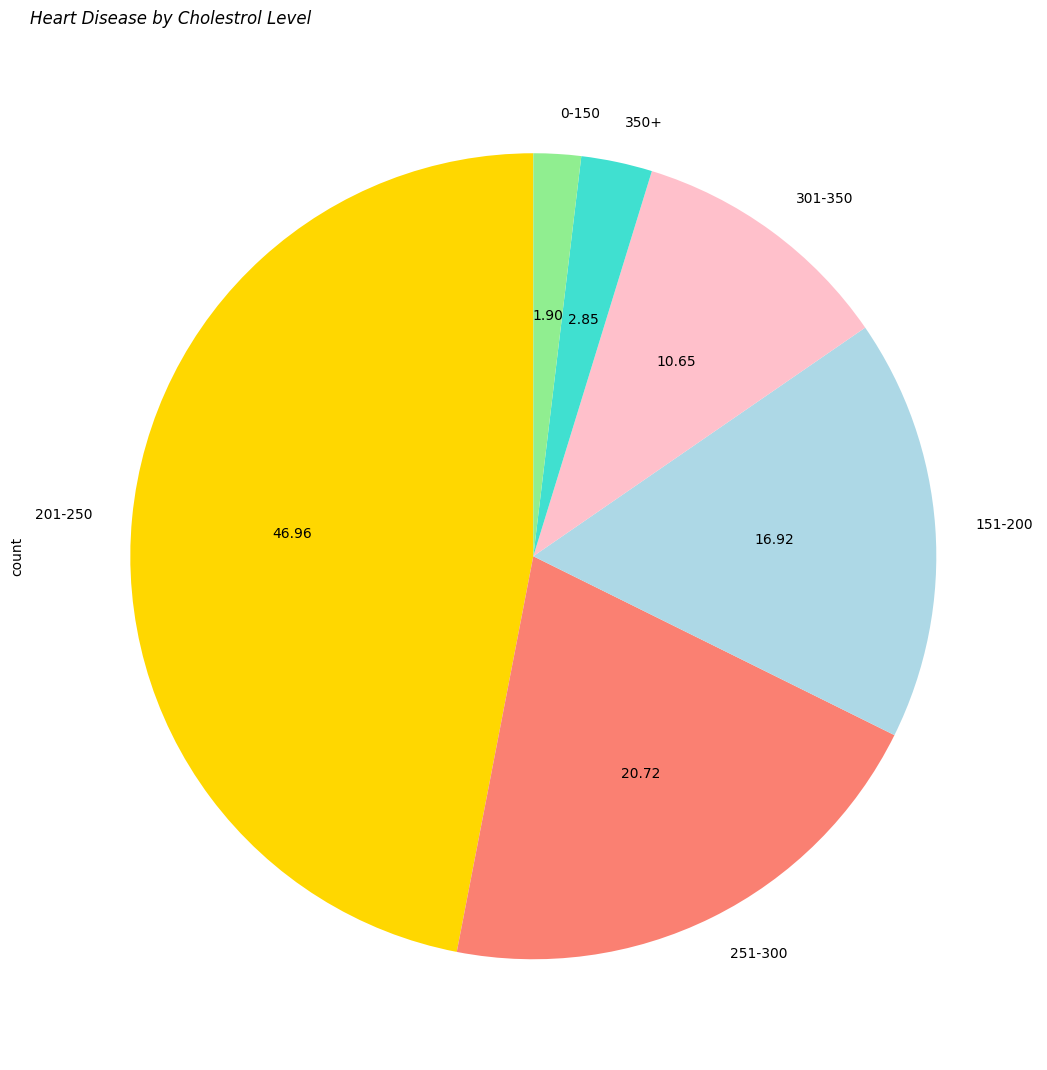

In [58]:
df1['bins'] = pd.cut(df1['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(13,14))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["gold", "salmon", "lightblue","pink","turquoise","lightgreen"],startangle=90,fontsize=10)
plt.title(label="Heart Disease by Cholestrol Level\n",loc="left",fontstyle='italic')

#### Patients having cholesterol level between 200 to 300 mg/dl have higher chances of having heart disease.

## 2.8. Blood Pressure vs Age

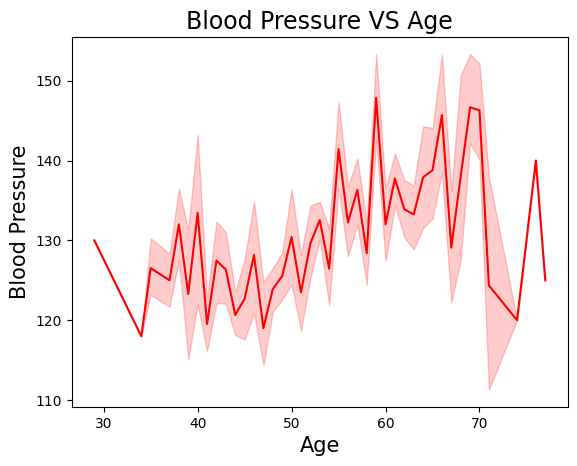

In [62]:
#Line Plot Creation of Blood Pressure VS Age

sns.lineplot(x='age', y='resting_blood_sugar', data=df1, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

###  Blood Pressure increases between age of 50 to 60 and continues the pattern till 70.

## 2.9. Corrolation matrix

<Axes: >

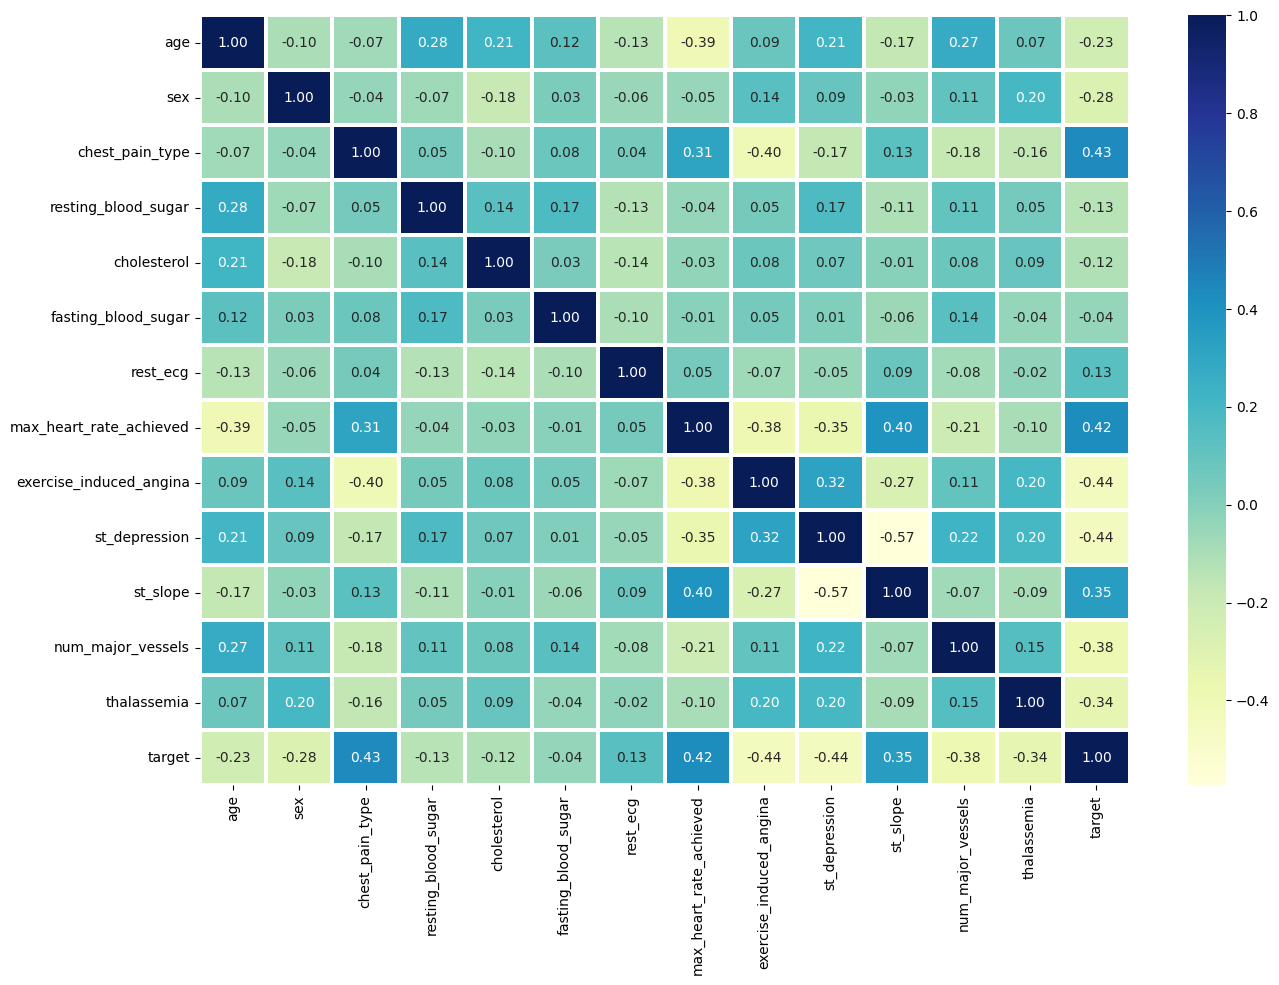

In [63]:
corr_matrix = df1.select_dtypes(include='number').corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=1.5,
            fmt=".2f",
            cmap="YlGnBu",
            ax=ax)


#### Observable from the heatmap above that there is a correlation between age and max_heart_rate_achieved with negative correlation of -0.39

## 2.10. Heart disease by Age and Heart rate

Text(0.5, 1.0, 'Max Heart Rate achieved v/s Age \n')

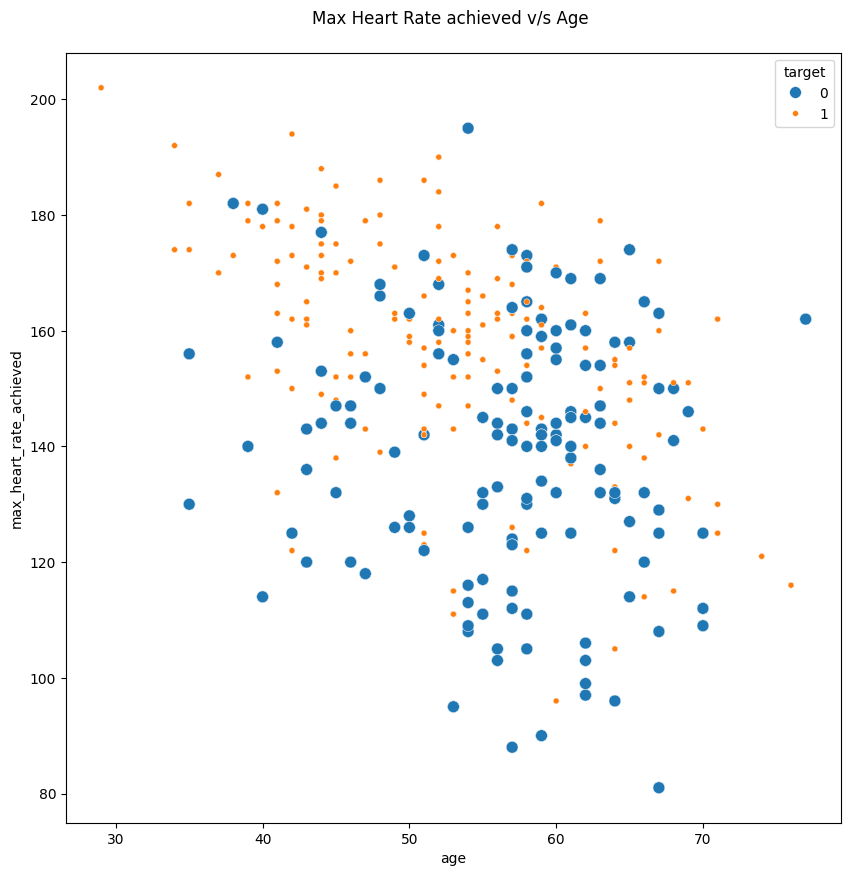

In [64]:

plt.figure(figsize = (10, 10))
sns.scatterplot(x='age', y='max_heart_rate_achieved',hue='target',data=df1,size='target')
plt.title("Max Heart Rate achieved v/s Age \n")

#### There are more number of people suffering form Heart Disease, between the age 55-65 and have Heart Rate between 140-160.

## 2.11. Heart Disease by Cholesterol and Age

Text(0.5, 1.0, 'Cholesterol v/s Age \n')

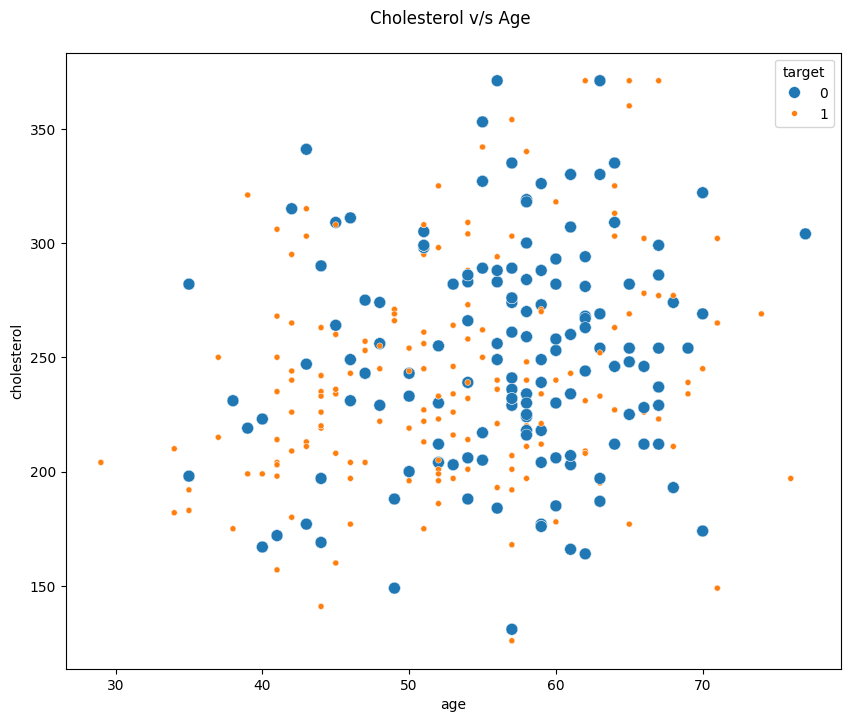

In [65]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='cholesterol',hue='target',data=df1,size='target')
plt.title("Cholesterol v/s Age \n")

#### Most of the people suffering from Heart Disease are above 50 and their Cholesterol Level ranges between 200-350.
### People with age<40  have low cholesterol level

Text(0.5, 1.0, 'max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n')

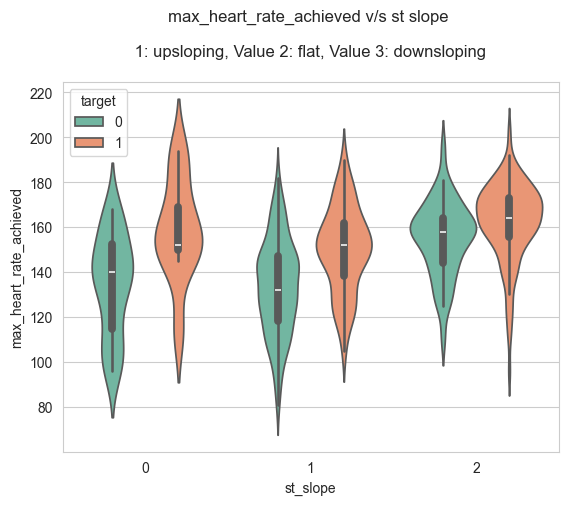

In [166]:
ax = sns.violinplot(x="st_slope", y="max_heart_rate_achieved", hue="target",data=df1, palette="Set2")
plt.title("max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n")

#### People suffering from Heart Disease, have max heart rate ranging between 120-170 and have downsloping meaning the signs of an unhealthy heart.

In [68]:
df.to_csv('Heart Disease Diagnostic.csv', sep='\t')